In [2]:
import time
from random import shuffle
from pdp_lib import processing as proc
from pdp_lib import util
from GA_lib import GA
from GA_lib import operation
from GA_lib import evaluate
from GA_lib import modify

# Load file (Use realative path), Create distances and duration tables


In [3]:
start_time = time.time()
# use 'relative path' in filename
filename = 'pdp_instances/LiLim/pdp_100/lc107.txt'

numVehicles, loadCapacities, speed, data = proc.load_file(filename)
LOCATIONS = data[0]
demands = data[1]
timeWindows = data[2]
serviceTimes = data[3]
pickupSiblings = data[4]
deliverySiblings = data[5]
requestType = data[6]
REQUESTS = proc.generate_request(pickupSiblings,deliverySiblings,requestType)
DISTANCES = proc.createDistanceTable(LOCATIONS)
DURATIONS = proc.createDurationTable(LOCATIONS, DISTANCES, serviceTimes, speed)


print(" processing time --- %s seconds ---" % (time.time() - start_time))

 processing time --- 0.02900385856628418 seconds ---


# Unoptimized Routes

Unoptimized distances is: 3367.79589042


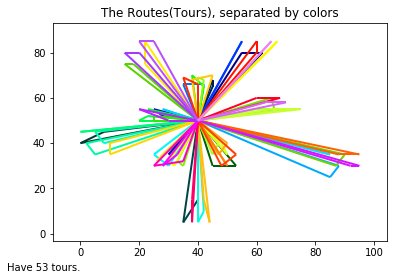

In [4]:
unlimitedVehicles=300
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,unlimitedVehicles,maxSpot=2)
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Unoptimized distances is: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)

# Create a chromosome.

Chromosome initializing time --- 1.2299871444702148 seconds ---
Tour Distances of chromosome: 1632.45835904


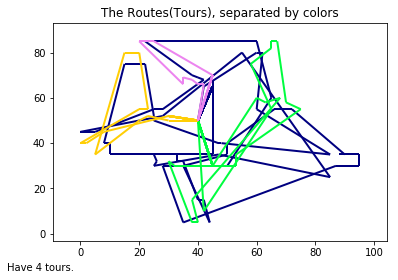

[[0, [11, 22, 39, 32, 12, 52, 41, 16, 8, 45, 34, 21, 17, 26, 20, 29, 3, 30, 13, 33, 27, 23, 40, 25, 6, 36, 42, 50, 35, 0, 2, 47, 49], [5, 96, 95, 90, 81, 104, 65, 67, 24, 25, 13, 17, 18, 33, 32, 31, 43, 42, 41, 57, 55, 53, 40, 62, 63, 86, 83, 76, 78, 71, 70, 73, 77, 79, 60, 48, 45, 61, 103, 88, 97, 100, 106, 14, 9, 6, 4, 23, 102, 26, 36, 39, 101, 22, 99, 80, 66, 51, 50, 52, 49, 47, 105, 69, 1, 75]], [1, [48, 31, 46, 38, 24, 28, 51, 44, 43, 37], [54, 87, 98, 94, 93, 92, 84, 82, 74, 72, 44, 46, 58, 56, 59, 64, 85, 89, 91, 68]], [2, [19, 10, 18, 15, 14, 9], [20, 27, 29, 35, 19, 15, 28, 30, 38, 37, 34, 21]], [3, [4, 1, 7, 5], [3, 7, 8, 11, 10, 16, 12, 2]], [4, [], []], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []]]


In [6]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)

# Try restricting the 'max spots' to visit not more than 10 spots per vehicle

Chromosome initializing time --- 0.01600480079650879 seconds ---
Tour Distances of chromosome: 2110.15142358


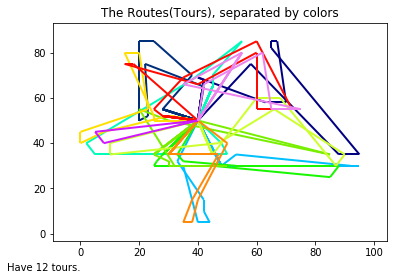

[[0, [51, 43, 48, 41, 3], [98, 78, 71, 94, 93, 92, 84, 89, 6, 4]], [1, [7, 14, 6, 11, 2], [5, 13, 27, 29, 16, 14, 12, 9, 23, 102]], [2, [29, 28, 36, 38, 22], [42, 55, 54, 53, 56, 40, 70, 73, 74, 64]], [3, [5, 18, 34, 0, 52], [65, 62, 35, 37, 8, 100, 106, 2, 1, 75]], [4, [21, 37, 23, 40, 27], [43, 41, 72, 77, 80, 68, 48, 51, 50, 49]], [5, [24, 25, 32, 10, 42], [81, 104, 20, 30, 44, 61, 103, 45, 46, 52]], [6, [45, 44, 16, 35, 39], [32, 31, 67, 86, 76, 79, 85, 88, 91, 69]], [7, [19, 15, 9, 12, 20], [24, 25, 19, 15, 28, 39, 101, 38, 34, 21]], [8, [30, 31, 33, 26], [63, 57, 58, 60, 59, 66, 47, 105]], [9, [50, 13, 47, 8, 4], [17, 18, 7, 96, 90, 83, 97, 11, 26, 22]], [10, [17], [33, 36]], [11, [46, 1, 49], [3, 95, 87, 82, 10, 99]], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []]]


In [7]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)

# Test Crossover

In [8]:

parent1 = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10000)
parent2 = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10000)

In [23]:
start_time = time.time()
maxSpot = 10000
child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, parent1, parent2,maxSpot)
dist = evaluate.chromosomeRoutesDistance(parent1,DISTANCES)

print("Chromosome crossover time --- %s seconds ---" % (time.time()-start_time))
print('Parent1 Distances of chromosome: '+str(dist))
dist = evaluate.chromosomeRoutesDistance(parent2,DISTANCES)
print('Parent2 Distances of chromosome: '+str(dist))
print (child1)
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('Child2 Distances of chromosome: '+str(dist))


Chromosome crossover time --- 0.3659689426422119 seconds ---
Parent1 Distances of chromosome: 1559.22585135
Parent2 Distances of chromosome: 1490.64950009
[[0, [5, 48, 52, 47, 4, 41, 51, 44, 1, 46, 26, 16, 3, 8, 45, 2, 49, 42, 50, 6, 39, 12, 0], [24, 25, 32, 31, 17, 18, 13, 5, 3, 96, 98, 90, 87, 86, 81, 104, 78, 76, 83, 7, 10, 8, 94, 95, 92, 71, 82, 85, 93, 97, 9, 11, 14, 100, 106, 99, 88, 6, 4, 2, 91, 79, 47, 105, 1, 75]], [4, [14, 18, 9], [27, 29, 35, 37, 19, 15]], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [3, [43], [84, 89]], [2, [15, 13, 20, 10, 7, 17, 11, 19], [20, 33, 38, 30, 16, 12, 26, 28, 39, 101, 36, 34, 23, 102, 22, 21]], [1, [40, 38, 32, 22, 35, 33, 27, 29, 21, 28, 36, 31, 24, 37, 30, 34, 25, 23], [63, 65, 67, 43, 41, 42, 57, 55, 54, 53, 56, 62,

In [24]:
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('old Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('old Child2 Distances of chromosome: '+str(dist))
for i in range(100):
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, child1, child2,maxSpot)
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('new Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('new Child2 Distances of chromosome: '+str(dist))


old Child1 Distances of chromosome: 1631.10555785
[[0, [5, 42, 46, 51, 1, 0, 50, 3, 12, 41, 16, 48, 49, 47, 6, 45, 52, 8, 2, 44, 4, 26, 39, 20, 10, 15, 7], [20, 32, 31, 24, 25, 17, 18, 13, 7, 5, 3, 98, 96, 95, 90, 87, 86, 81, 104, 78, 76, 71, 82, 83, 94, 92, 10, 8, 28, 30, 11, 6, 9, 14, 16, 39, 101, 85, 97, 93, 100, 106, 99, 12, 88, 79, 91, 2, 4, 1, 75, 21, 47, 105]], [1, [40, 32, 22, 35, 33, 27, 29, 21, 28, 36, 31, 37, 30, 34, 25, 23, 13], [63, 65, 67, 43, 41, 42, 57, 55, 54, 53, 56, 62, 40, 72, 70, 73, 58, 60, 59, 45, 61, 103, 77, 80, 68, 48, 51, 26, 22, 66, 69, 50, 52, 49]], [3, [43, 11], [84, 89, 23, 102]], [4, [17, 19], [33, 38, 36, 34]], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [2, [14, 24, 38, 18, 9], [19, 15, 27, 29, 35, 37, 44, 46, 74, 64]]]
old C